# Myanmar Currency Classification Project with transfer learning using a MobileNet architecture 

##  Project Overview
 The Myanmar Currency Classification Project aims to develop a robust and efficient system for classifying Myanmar banknotes using Google’s Teachable Machine. The model  is typically based on a pre-trained MobileNet architecture, which is optimized for speed and efficiency, making it suitable for mobile and web applications.

 This system assists in automating the process of currency recognition, which is useful in applications like ATMs, vending machines, and other financial systems requiring currency verification.

 The MobileNet architecture is particularly well-suited for tasks like image classification because it balances accuracy with computational efficiency, allowing it to run on a wide range of devices, including those with limited resources.

The model was fine-tuned to classify images into 7 categories. The MobileNet model within Teachable Machine extracts features from  images, and the final dense layers classify these features into the 7 categories










## Import Libraries

In [ ]:
import os
import numpy as np
import pandas as pd
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from keras import optimizers
from keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
from keras.models import load_model
from PIL import Image, ImageOps
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

## Data Preprocessing

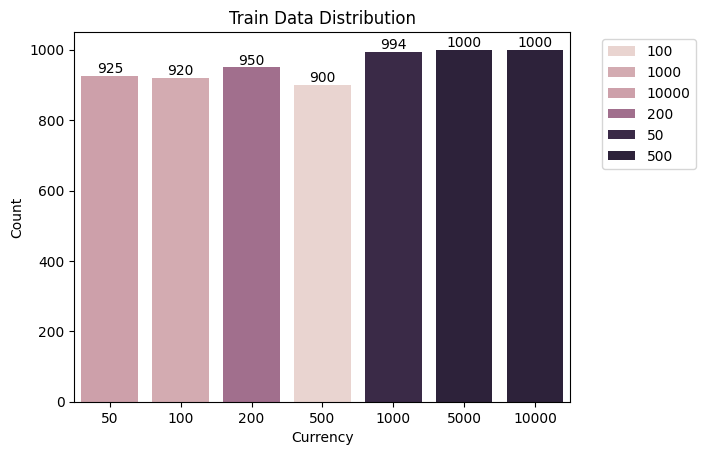

In [ ]:
train_data = pd.DataFrame({
    "Currency": [100, 1000, 10000, 200, 50, 500, 5000],
    "Count": [920, 994, 1000, 950, 925, 900, 1000]
})

# Plotting the data
ax = sns.barplot(data = train_data, x = "Currency", y = "Count",hue="Count")
for i in ax.containers:
    ax.bar_label(i);
plt.xlabel("Currency")
plt.ylabel("Count")

handles, labels = ax.get_legend_handles_labels()
new_labels = train_data["Currency"].astype(str).tolist()
ax.legend(handles, new_labels, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title("Train Data Distribution")
plt.show()

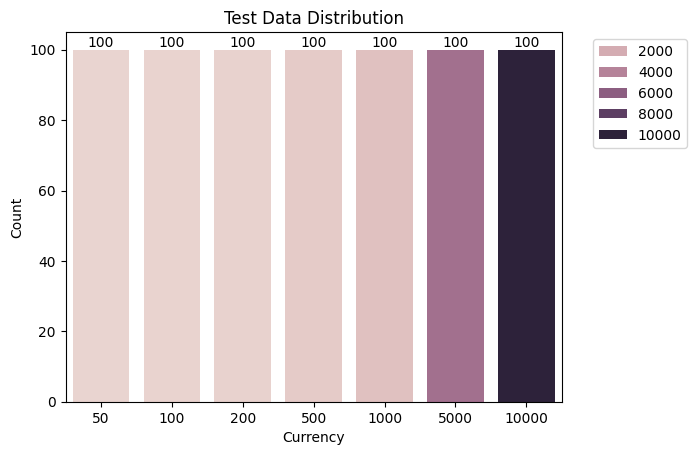

In [ ]:
test_data = pd.DataFrame({
    "Currency": [100, 1000, 10000, 200, 50, 500, 5000],
    "Count": [100, 100, 100, 100, 100, 100, 100]
})

# Plotting the data
ax = sns.barplot(data=test_data, x="Currency", y="Count", hue="Currency")
for i in ax.containers:
    ax.bar_label(i);
plt.xlabel("Currency")
plt.ylabel("Count")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Test Data Distribution")
plt.show()

In [ ]:
def preprocess_image(image_path):
    """
    Preprocess the image to be suitable for CNN input.

    Parameters:
    - image_path: str, path to the image file

    Returns:
    - normalized_image_array: np.array, preprocessed image ready for model input
    """
    # Load the image and convert it to RGB
    image = Image.open(image_path).convert("RGB")

    # Resize the image to 224x224 and crop from the center
    size = (224, 224)
    image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)

    # Convert the image to a numpy array
    image_array = np.asarray(image)

    # Normalize the image array
    normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1

    # Create the array of the right shape to feed into the keras model
    data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
    data[0] = normalized_image_array
    return data


In [ ]:
# Define the path to the train dataset
train_data_dir = '/content/drive/MyDrive/Currency Detection/data/train/train'

# Create a data generator for the test dataset
train_datagen = ImageDataGenerator(rescale=1./255)

# Define the test data generator
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224), # Change target size to match the input size of  model
    batch_size=32,
    class_mode='categorical',
    shuffle=False # Important to get the true labels in the right order
)

Found 6689 images belonging to 7 classes.


In [ ]:
# Define the path to the test dataset
test_data_dir = '/content/drive/MyDrive/Currency Detection/data/test/test'

# Create a data generator for the test dataset
test_datagen = ImageDataGenerator(rescale=1./255)

# Define the test data generator
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(224, 224), # Change target size to match the input size of your model
    batch_size=32,
    class_mode='categorical',
    shuffle=False # Important to get the true labels in the right order
)

Found 700 images belonging to 7 classes.


## Load and Compile Trained Model

In [ ]:
# Load  trained model
model = tf.keras.models.load_model('/content/drive/MyDrive/IDP_Project/Models/converted_keras/keras_model.h5')


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_8 (Sequential)   (None, 1280)              410208    
                                                                 
 sequential_10 (Sequential)  (None, 7)                 128800    
                                                                 
Total params: 539008 (2.06 MB)
Trainable params: 524928 (2.00 MB)
Non-trainable params: 14080 (55.00 KB)
_________________________________________________________________


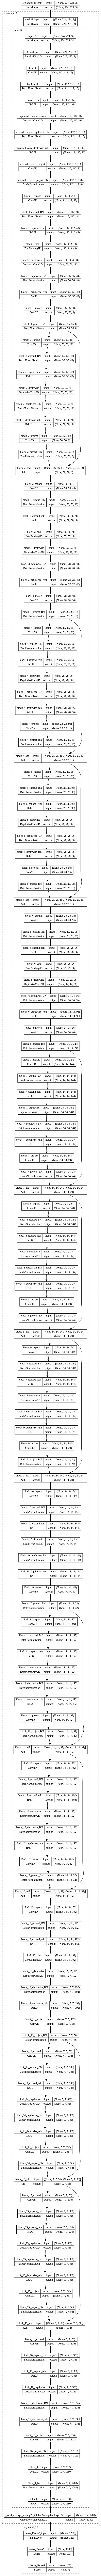

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='/content/drive/MyDrive/IDP_Project/model.png', show_shapes=True, expand_nested=True)

## Model Evaluation

In [ ]:
predicted_classes = []
true_labels = train_generator.classes

for i in range(len(train_generator.filenames)):
    image_path = train_generator.filepaths[i]
    data = preprocess_image(image_path)
    prediction = model.predict(data)
    index = np.argmax(prediction)
    predicted_classes.append(index)

predicted_classes = np.array(predicted_classes)

# Define the class names
class_names = list(train_generator.class_indices.keys())


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 29ms/step


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
# Calculate and print the accuracy
train_accuracy = accuracy_score(true_labels, predicted_classes)
print(f'Train Accuracy: {train_accuracy * 100:.2f}%')

Train Accuracy: 99.48%


In [ ]:
# Generate the classification report
train_report = classification_report(true_labels, predicted_classes, target_names=class_names)
print(train_report)


              precision    recall  f1-score   support

         100       1.00      1.00      1.00      1017
        1000       0.99      1.00      0.99      1003
       10000       1.00      0.99      0.99      1069
         200       1.00      0.99      1.00       900
          50       0.99      1.00      1.00       900
         500       1.00      0.98      0.99       900
        5000       0.99      1.00      0.99       900

    accuracy                           0.99      6689
   macro avg       0.99      0.99      0.99      6689
weighted avg       0.99      0.99      0.99      6689



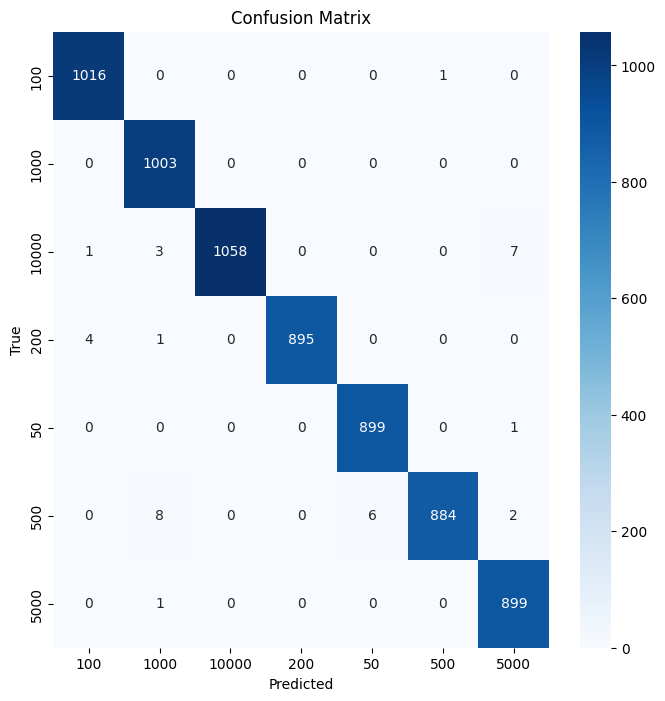

In [ ]:
# Compute the confusion matrix
train_cm = confusion_matrix(true_labels, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Predict on the entire test set
test_predicted_classes = []
test_true_labels = test_generator.classes

for i in range(len(test_generator.filenames)):
    image_path = test_generator.filepaths[i]
    data = preprocess_image(image_path)
    prediction = model.predict(data)
    index = np.argmax(prediction)
    test_predicted_classes.append(index)

test_predicted_classes = np.array(test_predicted_classes)

# Define the class names
test_class_names = list(test_generator.class_indices.keys())


1/1 [==============================] - 0s 34ms/step


In [ ]:
# Generate the classification report
test_report = classification_report(test_true_labels, test_predicted_classes, target_names=test_class_names)
print(test_report)


              precision    recall  f1-score   support

         100       0.93      0.98      0.96       100
        1000       0.98      1.00      0.99       100
       10000       0.98      0.97      0.97       100
         200       0.99      0.93      0.96       100
          50       0.99      0.98      0.98       100
         500       1.00      0.95      0.97       100
        5000       0.94      1.00      0.97       100

    accuracy                           0.97       700
   macro avg       0.97      0.97      0.97       700
weighted avg       0.97      0.97      0.97       700



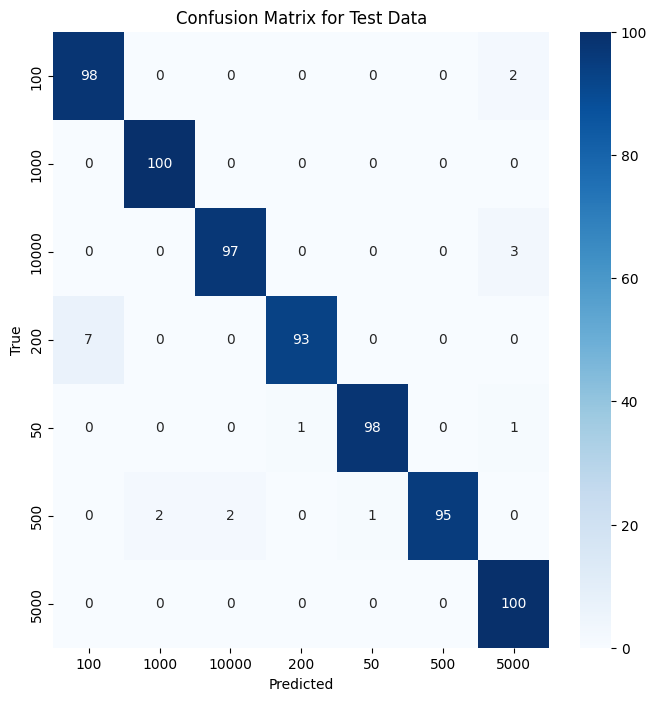

In [ ]:
# Compute the confusion matrix
true_cm = confusion_matrix(test_true_labels, test_predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(true_cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_class_names, yticklabels=test_class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Test Data')
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
# Calculate and print the accuracy
test_accuracy = accuracy_score(test_true_labels, test_predicted_classes)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Test Accuracy: 97.29%


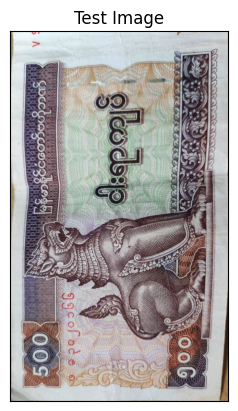

In [ ]:
import cv2
image_path = '/content/drive/MyDrive/Currency Detection/data/Valid/Valid/500.jpg'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
class_names = open("/content/drive/MyDrive/IDP_Project/Models/converted_keras/labels.txt", "r").readlines()

# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

# Replace this with the path to your image
image = Image.open(image_path).convert("RGB")

# resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)

# turn the image into a numpy array
image_array = np.asarray(image)

# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1

# Load the image into the array
data[0] = normalized_image_array

# Predicts the model
prediction = model.predict(data)
index = np.argmax(prediction)
class_name = class_names[index]
confidence_score = prediction[0][index]

# Print prediction and confidence score
print("Class:", class_name[2:], end="")
print("Confidence Score:", confidence_score)


1/1 [==============================] - 0s 27ms/step
Class: 500
Confidence Score: 0.9962999
